In [3]:
!pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.1/27.1 MB 3.1 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 2.8 MB/s eta 0:00:00


In [4]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 1.4 MB/s eta 0:00:00a 0:00:010m


In [40]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

# Modeling
from sklearn.metrics import mean_squared_error , r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor , AdaBoostRegressor
from sklearn.linear_model import LinearRegression , Ridge , Lasso
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error,r2_score , mean_squared_error , mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

In [20]:
df = pd.read_csv("/Users/anand/Desktop/mlProject/Notebook/data/stud.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


#### Preparing X and Y Variables

In [28]:
x = df.drop(columns=['math score'] , axis= 1)
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [29]:
y = df['math score']
y.head()


0    72
1    69
2    90
3    47
4    76
Name: math score, dtype: int64

In [30]:
num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder , StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", numeric_transformer, num_features),
        ("StandardScaler", categorical_transformer, cat_features)
    ]
)

In [31]:
x = preprocessor.fit_transform(x)

In [32]:
x

array([[ 0.19399858,  0.39149181,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       [ 1.42747598,  1.31326868,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.77010859,  1.64247471,  1.        , ...,  1.        ,
         0.        ,  1.        ],
       ...,
       [ 0.12547206, -0.20107904,  1.        , ...,  0.        ,
         1.        ,  0.        ],
       [ 0.60515772,  0.58901542,  1.        , ...,  1.        ,
         1.        ,  0.        ],
       [ 1.15336989,  1.18158627,  1.        , ...,  0.        ,
         0.        ,  1.        ]])

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train.shape ,x_test.shape

((800, 19), (200, 19))

In [42]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mse)  # Corrected: Use mse directly
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square


In [45]:
models = {
    "LinearRegression" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "KNeighborsRegressor" : KNeighborsRegressor(),
    "Random Forest Regressor" : RandomForestRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "XGBRegressor" : XGBRegressor(),
    "CatBoosting Regressor" : CatBoostRegressor(verbose=False),
    "AdaBoost Regressor" : AdaBoostRegressor(),
}
model_list = []
r2_list = []

for i in range(len(list(models))):
    model = models[list(models)[i]]
    model.fit(x_train, y_train)

    # make predict 
    y_train_pred = model.predict(x_train)
    y_test_pred = model.predict(x_test)

    model_train_mae , model_train_rmse , model_train_r2 = evaluate_model(y_train , y_train_pred)
    model_test_mae , model_test_rmse , model_test_r2 = evaluate_model(y_test , y_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print("Model performance for the training test ")
    print("MAE : {:.4f} " .format(model_train_mae))
    print("RMSE : {:.4f} " .format(model_train_rmse))
    print("R2 : {:.4f} " .format((model_train_r2)))

    print("----------------------------------------------> ")

    print("Model performance for the test set ")
    print("MAE : {:.4f} " .format(model_test_mae))
    print("RMSE : {:.4f} " .format(model_test_rmse))
    print("R2 : {:.4f} " .format((model_test_r2)))

    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')







LinearRegression
Model performance for the training test 
MAE : 4.2667 
RMSE : 5.3231 
R2 : 0.8743 
----------------------------------------------> 
Model performance for the test set 
MAE : 4.2148 
RMSE : 5.3940 
R2 : 0.8804 


Lasso
Model performance for the training test 
MAE : 5.2063 
RMSE : 6.5938 
R2 : 0.8071 
----------------------------------------------> 
Model performance for the test set 
MAE : 5.1579 
RMSE : 6.5197 
R2 : 0.8253 


Ridge
Model performance for the training test 
MAE : 4.2650 
RMSE : 5.3233 
R2 : 0.8743 
----------------------------------------------> 
Model performance for the test set 
MAE : 4.2111 
RMSE : 5.3904 
R2 : 0.8806 


KNeighborsRegressor
Model performance for the training test 
MAE : 4.5168 
RMSE : 5.7128 
R2 : 0.8552 
----------------------------------------------> 
Model performance for the test set 
MAE : 5.6190 
RMSE : 7.2538 
R2 : 0.7838 


Random Forest Regressor
Model performance for the training test 
MAE : 1.8516 
RMSE : 2.3131 
R2 : 0.97

In [46]:
pd.DataFrame(list(zip(model_list , r2_list)) , columns=['Model Name' , 'R2_Score']).sort_values(by = ["R2_Score"] , ascending = False)

,Model Name,R2_Score
2,Ridge,0.880593
0,LinearRegression,0.880433
7,CatBoosting Regressor,0.851632
4,Random Forest Regressor,0.849988
8,AdaBoost Regressor,0.845437
1,Lasso,0.825320
6,XGBRegressor,0.821220
3,KNeighborsRegressor,0.783770
5,Decision Tree,0.726369


In [50]:
Lin_model = LinearRegression(fit_intercept=True)
# Train the model
Lin_model = Lin_model.fit(x_train, y_train)
y_pred = Lin_model.predict(x_test)
score = r2_score(y_test , y_pred)*100
print("Accuracy of the model is %.2f:" %score)

Accuracy of the model is 88.04:


Text(0, 0.5, 'Predicted')

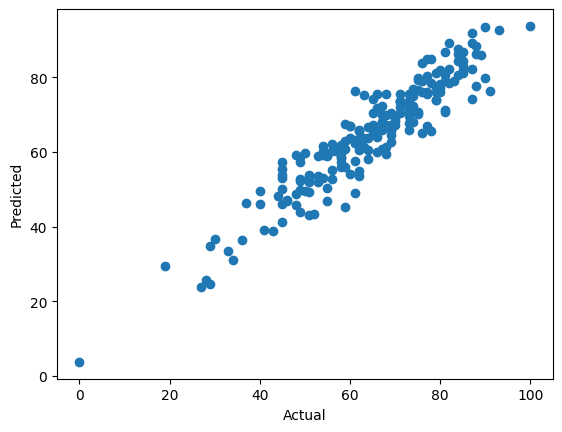

In [51]:
plt.scatter(y_test , y_pred);
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math score'>

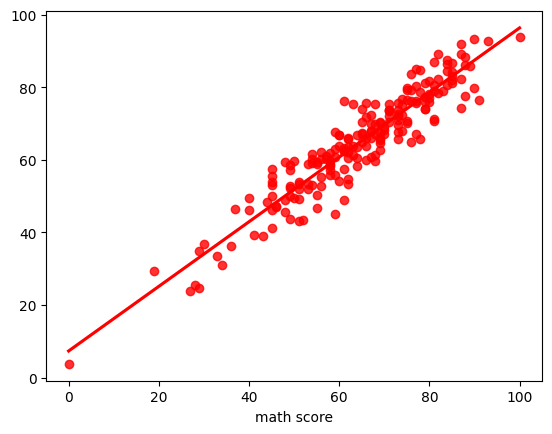

In [52]:
sns.regplot(x = y_test , y = y_pred , ci=None , color='red')

In [54]:
pred_df = pd.DataFrame({'Actual value' : y_test , 'Predited value':  y_pred , "Difference " : y_test-y_pred})
pred_df

,Actual value,Predited value,Difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
